## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

Link to Github Profile - https://github.com/zimzam22/houses12/tree/main

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

house = pd.read_csv("D:\\Assignment\\CPSC_4800\\houses.csv")

In [65]:
# Get a concise summary of the dataframe
summary = house.describe()

# Get information about the dataframe (structure, data types, non-null counts)
structure = house.info()

# Display the summary and structure
print("Summary of the dataset:")
print(summary)
print("\nStructure of the dataset:")
print(structure)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [66]:
house['LotFrontage'] = house['LotFrontage'].fillna(house['LotFrontage'].mean())

In [67]:
# Number of columns to check at a time
chunk_size = 20

# Calculate the total number of columns
num_columns = house.shape[1]

# Loop through the columns in chunks of 20
for start in range(0, num_columns, chunk_size):
    # Select the next chunk of 20 columns
    chunk = house.iloc[:, start:start + chunk_size]
    
    # Check for missing values in this chunk
    missing_values_chunk = chunk.isnull().sum()
    
    # Print the missing values for the current chunk
    print(f"Missing values for columns {start + 1} to {min(start + chunk_size, num_columns)}:")
    print(missing_values_chunk)
    print("\n")

Missing values for columns 1 to 20:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
dtype: int64


Missing values for columns 21 to 40:
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType      872
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
dtype: int64


Missing values for columns 41 to 60:
HeatingQC         0
CentralAir        0


In [68]:
# List of columns for which you want to impute the mode
columns_to_impute = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                     'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
                     'GarageCond', 'Fence', 'MiscFeature', 'Alley','PoolQC']

# Loop through each column and fill missing values with the mode
for column in columns_to_impute:
    mode_value = house[column].mode()[0]  # Find the mode for the column
    house[column] = house[column].fillna(mode_value)  # Impute missing values with the mode (no inplace=True)

In [69]:
# Number of columns to check at a time
chunk_size = 20

# Calculate the total number of columns
num_columns = house.shape[1]

# Loop through the columns in chunks of 20
for start in range(0, num_columns, chunk_size):
    # Select the next chunk of 20 columns
    chunk = house.iloc[:, start:start + chunk_size]
    
    # Check for missing values in this chunk
    missing_values_chunk = chunk.isnull().sum()
    
    # Print the missing values for the current chunk
    print(f"Missing values for columns {start + 1} to {min(start + chunk_size, num_columns)}:")
    print(missing_values_chunk)
    print("\n")

Missing values for columns 1 to 20:
Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
dtype: int64


Missing values for columns 21 to 40:
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      8
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
dtype: int64


Missing values for columns 41 to 60:
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath  

In [70]:
# List of columns to convert to categorical
categorical_columns = [
    'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'MoSold', 'YrSold','HalfBath','GarageCars'
]

# Convert each column to categorical
for column in categorical_columns:
    house[column] = house[column].astype('category')

In [71]:
summary = house.describe()

print("Summary Statistics for Numerical Columns:")
print(summary)

Summary Statistics for Numerical Columns:
                Id  LotFrontage        LotArea   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000    1460.000000  1452.000000  1460.000000   
mean    730.500000    70.049958   10516.828082   103.685262   443.639726   
std     421.610009    22.024023    9981.264932   181.066207   456.098091   
min       1.000000    21.000000    1300.000000     0.000000     0.000000   
25%     365.750000    60.000000    7553.500000     0.000000     0.000000   
50%     730.500000    70.049958    9478.500000     0.000000   383.500000   
75%    1095.250000    79.000000   11601.500000   166.000000   712.250000   
max    1460.000000   313.000000  215245.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.

In [72]:
# List of columns to check for outliers
columns_to_check = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
    'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'
]

# Function to calculate outliers based on IQR
def find_outliers(df, columns):
    outlier_counts = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identifying outliers and counting them
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]
    
    return outlier_counts

# Call the function
outlier_counts = find_outliers(house, columns_to_check)

# Display the outlier counts for each column
for col, count in outlier_counts.items():
    print(f"Outliers for column '{col}': {count}")

Outliers for column 'LotFrontage': 106
Outliers for column 'LotArea': 69
Outliers for column 'MasVnrArea': 96
Outliers for column 'BsmtFinSF1': 7
Outliers for column 'BsmtFinSF2': 167
Outliers for column 'BsmtUnfSF': 29
Outliers for column 'TotalBsmtSF': 61
Outliers for column '1stFlrSF': 20
Outliers for column '2ndFlrSF': 2
Outliers for column 'LowQualFinSF': 26
Outliers for column 'GrLivArea': 31
Outliers for column 'GarageArea': 21
Outliers for column 'WoodDeckSF': 32
Outliers for column 'OpenPorchSF': 77
Outliers for column 'EnclosedPorch': 208
Outliers for column '3SsnPorch': 24
Outliers for column 'ScreenPorch': 116
Outliers for column 'PoolArea': 7
Outliers for column 'MiscVal': 52
Outliers for column 'SalePrice': 61


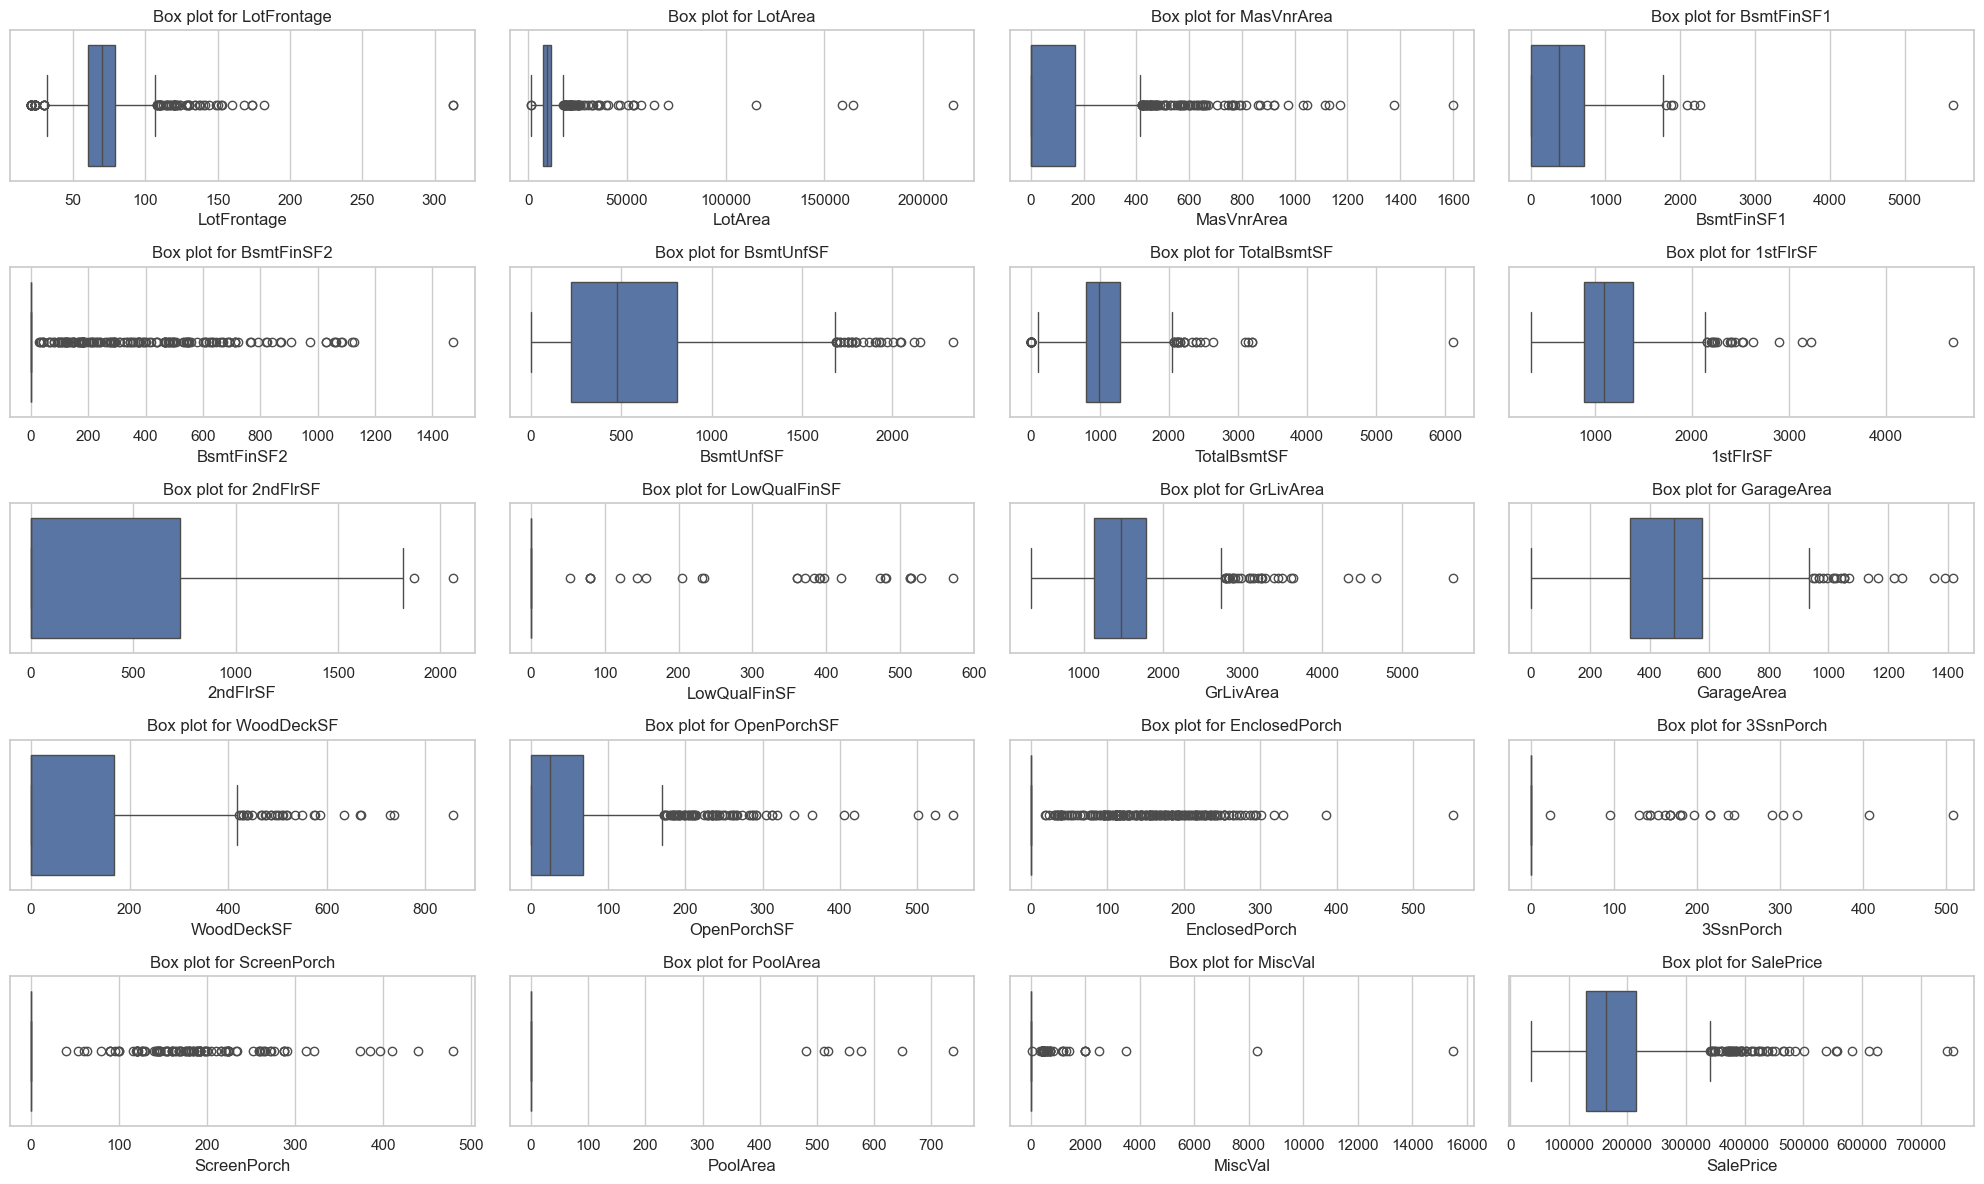

In [73]:
# Plot box plots for the specified columns
plt.figure(figsize=(20, 12))

# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a boxplot for each column
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(5, 4, i)  # 5 rows and 4 columns of subplots
    sns.boxplot(x=house[col])
    plt.title(f'Box plot for {col}')
    plt.tight_layout()

# Show all the box plots
plt.show()

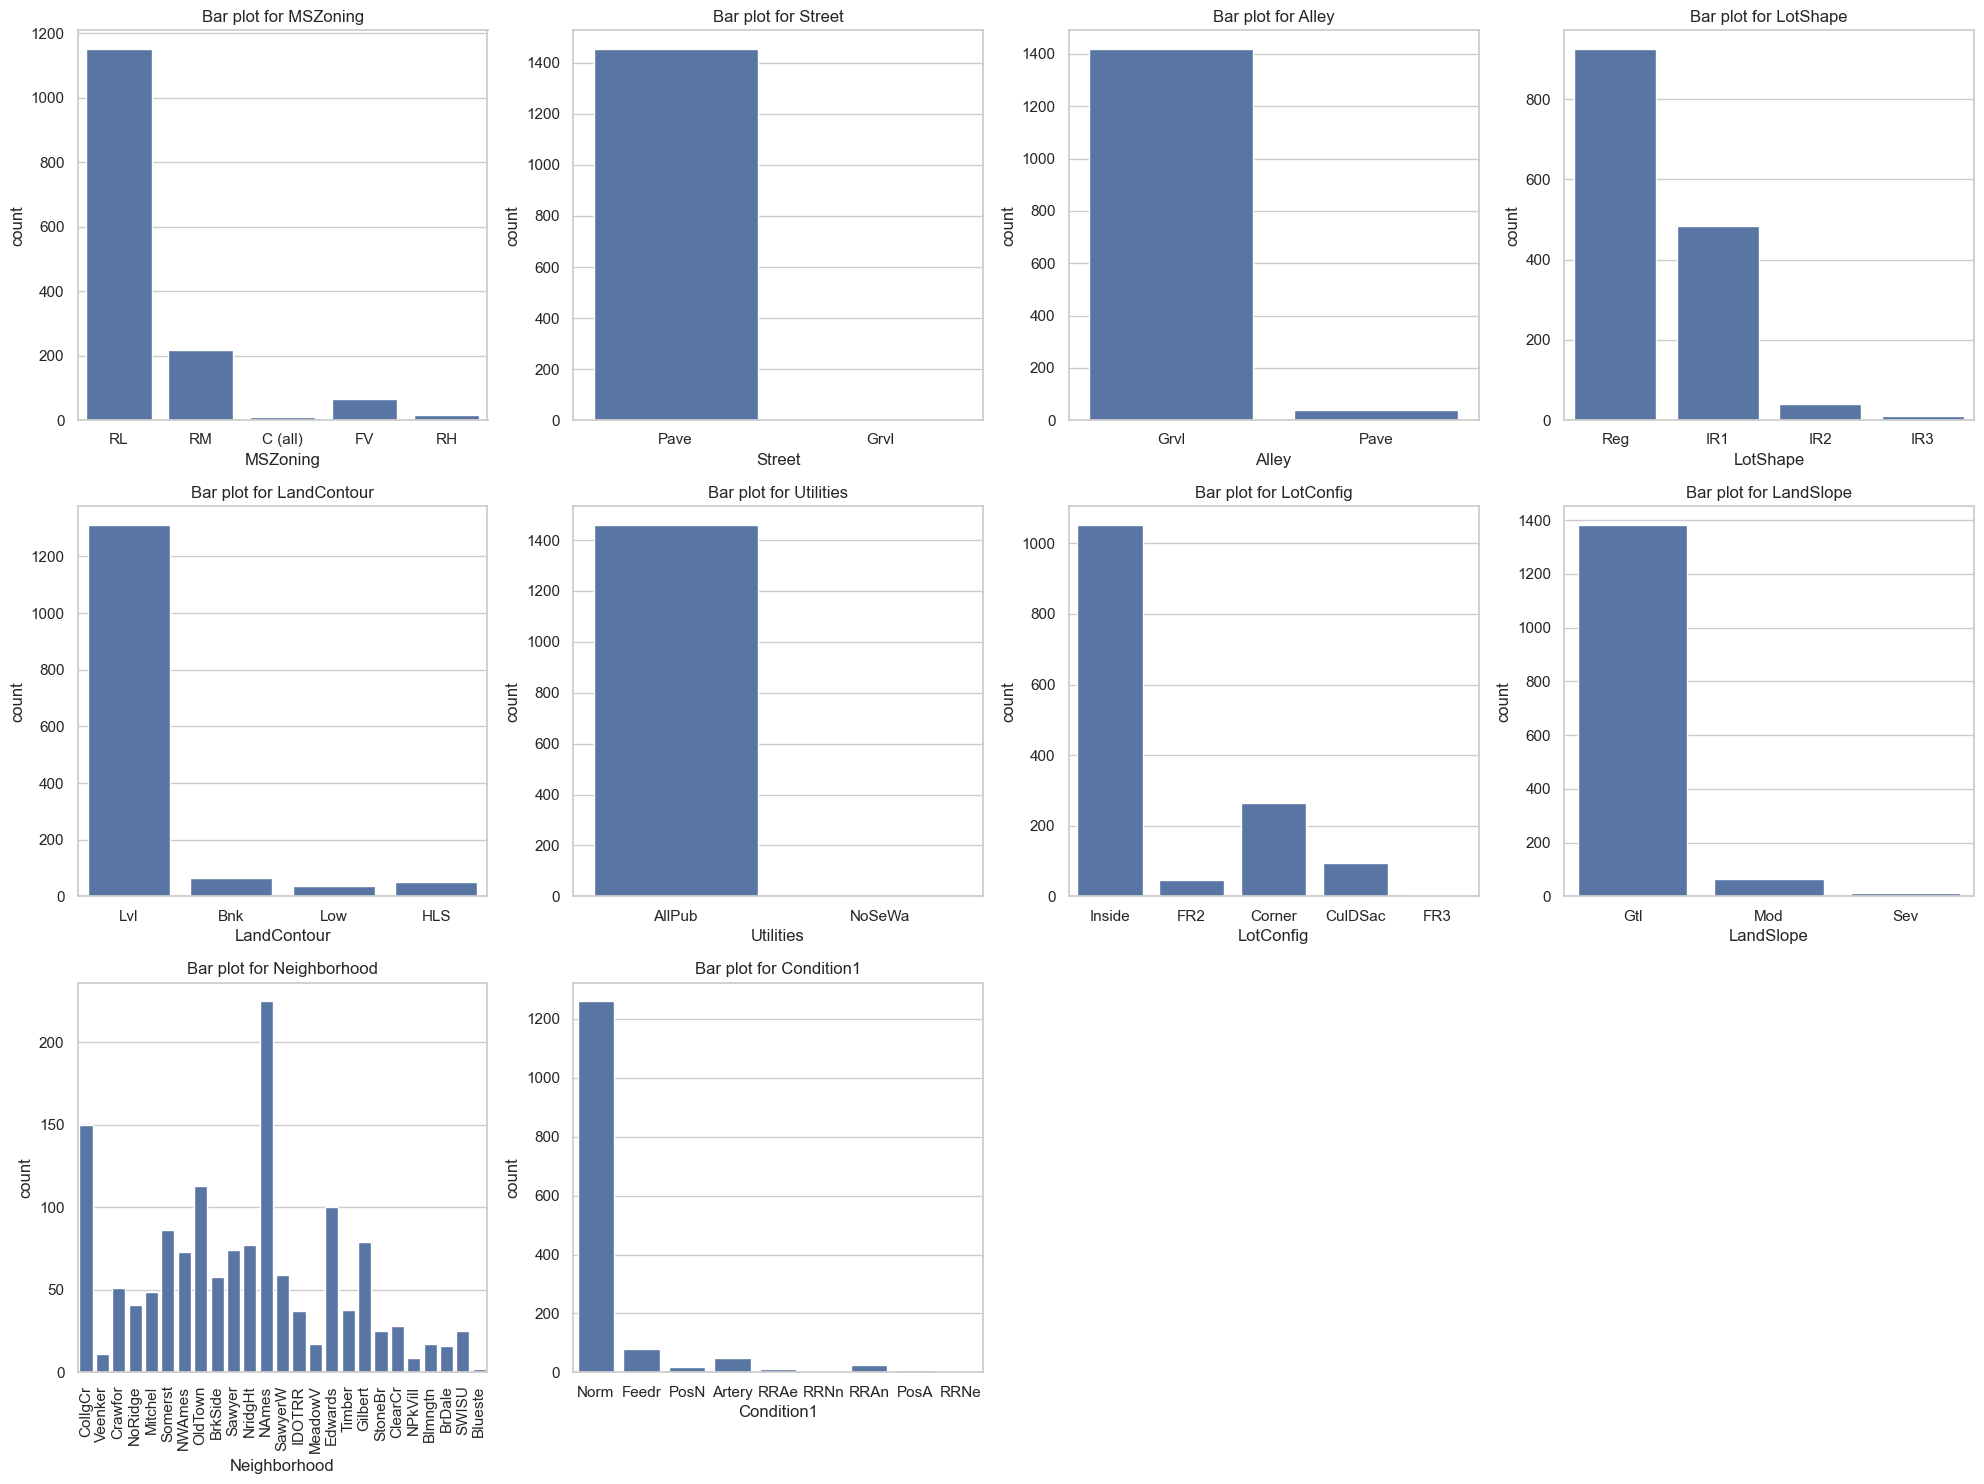

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get categorical columns to plot (excluding specified columns)
columns_to_check = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
    'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'
]

# Get categorical columns to plot (excluding specified columns)
other_columns = [col for col in house.columns if col not in columns_to_check and house[col].dtype == 'object']

# If you have too many categorical columns, limit the number
other_columns = other_columns[:10]  # Limit to first 10 categorical columns, you can change this

# Set up the grid size to match the number of remaining columns
num_plots = len(other_columns)
cols = 4  # Number of columns for the subplot grid
rows = (num_plots // cols) + (num_plots % cols > 0)  # Dynamic number of rows to fit the plots

# Plot bar graphs for the other columns
plt.figure(figsize=(20, 5 * rows))  # Adjust figure height to fit all plots

# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a bar plot for each of the remaining columns
for i, col in enumerate(other_columns, 1):
    plt.subplot(rows, cols, i)  # Dynamically determine row and column position
    sns.countplot(x=house[col])
    plt.title(f'Bar plot for {col}')
    
    # If it's a column with many categories like "neighborhood", rotate the labels
    if house[col].dtype == 'object' and len(house[col].unique()) > 20:  # You can adjust the threshold
        plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

    plt.tight_layout()

# Show all the bar plots
plt.show()


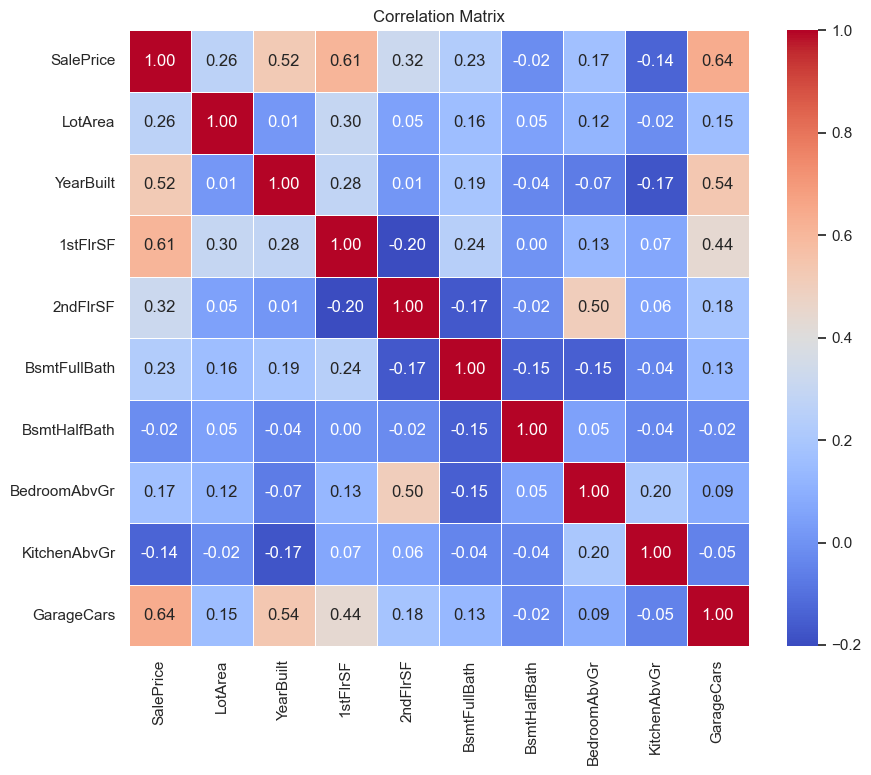

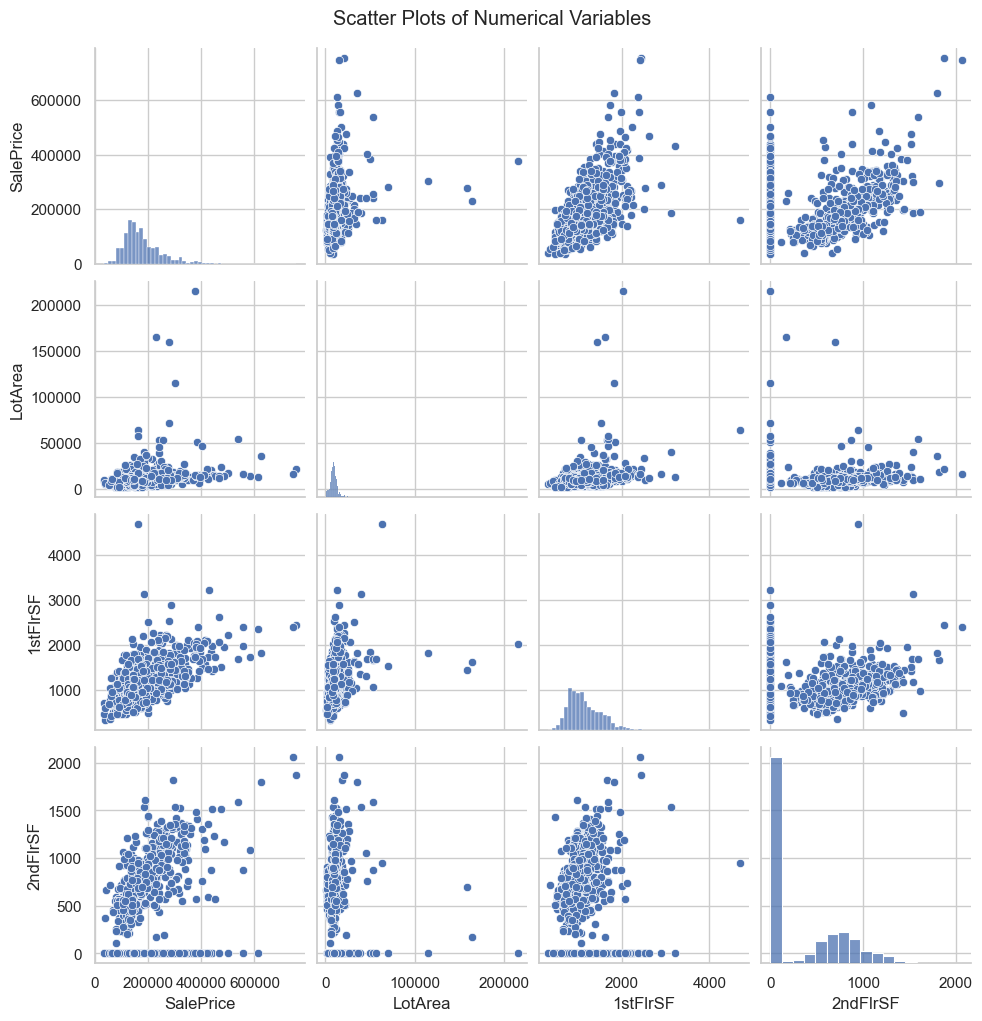

In [75]:
cols = ['SalePrice', 'LotArea', 'BldgType', 'YearBuilt', '1stFlrSF', '2ndFlrSF',
        'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars']

# Select only the columns needed from the dataset
df = house[cols]

# 1. Correlation Matrix for numerical variables (BldgType is categorical, so we exclude it)
numerical_cols = ['SalePrice', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 
                  'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars']

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 2. Scatter plots for numerical variables
# Plot scatter plots for each pair of numerical variables
sns.pairplot(df[numerical_cols])
plt.suptitle("Scatter Plots of Numerical Variables", y=1.02)
plt.show()
